In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("Fraudcheck.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)

In [4]:
df["TaxInc"]=pd.cut(df["Taxable.Income"],bins=[10002,30000,99620],labels=["Risky","Good"])

## Lets assume:taxable_income<=30000 as "Risky=0" and others are "Good=1"

In [5]:
df=pd.get_dummies(df,columns=["TaxInc"],drop_first=True)

In [6]:
df.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


In [7]:
x=df.iloc[:,0:8]
y=df["TaxInc_Good"]

In [8]:
x

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: TaxInc_Good, Length: 600, dtype: uint8

In [10]:
df['TaxInc_Good'].unique()

array([1, 0], dtype=uint8)

In [11]:
df['TaxInc_Good'].value_counts()

1    476
0    124
Name: TaxInc_Good, dtype: int64

In [12]:
colnames=list(df.columns)

In [13]:
colnames

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

In [14]:
#Splitting data into trainig and testing data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [15]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [16]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

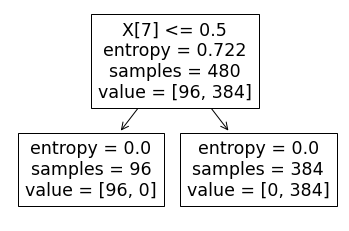

In [17]:
#Plot the decision tree
tree.plot_tree(model);

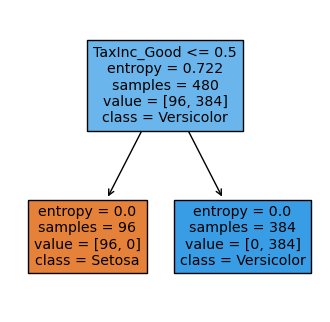

In [18]:
fn=['Taxable.Income','City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urben=YES','TaxInc_Good']
cn=['Setosa','Versicolor','Virginica']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=100)
tree.plot_tree(model,
              feature_names=fn,
              class_names=cn,
              filled=True);

In [19]:
#Predicting on test Dataset
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1    92
0    28
dtype: int64

In [20]:
preds

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [21]:
#Getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0,1
TaxInc_Good,,
0,28,0
1,0,92


In [22]:
#Accuracy
np.mean(preds==y_test)

1.0

In [23]:
#Building Decision Tree Classifier (CART) using Gini Criteria
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [24]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [25]:
#Prediction and compucting accuracy
pred=model.predict(x_test)
np.mean(pred==y_test)

1.0

# Hyperparameter tunning

In [26]:
np.logspace(0,-15,num=20)

array([1.00000000e+00, 1.62377674e-01, 2.63665090e-02, 4.28133240e-03,
       6.95192796e-04, 1.12883789e-04, 1.83298071e-05, 2.97635144e-06,
       4.83293024e-07, 7.84759970e-08, 1.27427499e-08, 2.06913808e-09,
       3.35981829e-10, 5.45559478e-11, 8.85866790e-12, 1.43844989e-12,
       2.33572147e-13, 3.79269019e-14, 6.15848211e-15, 1.00000000e-15])

In [27]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
Gmodel=GaussianNB()

In [28]:
cv_method=RepeatedStratifiedKFold(n_splits=5,n_repeats=8,random_state=999)
cv_method

RepeatedStratifiedKFold(n_repeats=8, n_splits=5, random_state=999)

In [29]:
from sklearn.preprocessing import PowerTransformer
params_NB={'var_smoothing':np.logspace(0,-15,num=100)}
params_NB

{'var_smoothing': array([1.00000000e+00, 7.05480231e-01, 4.97702356e-01, 3.51119173e-01,
        2.47707636e-01, 1.74752840e-01, 1.23284674e-01, 8.69749003e-02,
        6.13590727e-02, 4.32876128e-02, 3.05385551e-02, 2.15443469e-02,
        1.51991108e-02, 1.07226722e-02, 7.56463328e-03, 5.33669923e-03,
        3.76493581e-03, 2.65608778e-03, 1.87381742e-03, 1.32194115e-03,
        9.32603347e-04, 6.57933225e-04, 4.64158883e-04, 3.27454916e-04,
        2.31012970e-04, 1.62975083e-04, 1.14975700e-04, 8.11130831e-05,
        5.72236766e-05, 4.03701726e-05, 2.84803587e-05, 2.00923300e-05,
        1.41747416e-05, 1.00000000e-05, 7.05480231e-06, 4.97702356e-06,
        3.51119173e-06, 2.47707636e-06, 1.74752840e-06, 1.23284674e-06,
        8.69749003e-07, 6.13590727e-07, 4.32876128e-07, 3.05385551e-07,
        2.15443469e-07, 1.51991108e-07, 1.07226722e-07, 7.56463328e-08,
        5.33669923e-08, 3.76493581e-08, 2.65608778e-08, 1.87381742e-08,
        1.32194115e-08, 9.32603347e-09, 6.57933

In [30]:
gs_NB=GridSearchCV(estimator=Gmodel,param_grid=params_NB,cv=cv_method,verbose=1,scoring='accuracy')
gs_NB

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=8, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 7.05480231e-01, 4.97702356e-01, 3.51119173e-01,
       2.47707636e-01, 1.74752840e-01, 1.23284674e-01, 8.69749003e-02,
       6.13590727e-02, 4.32876128e-02, 3.05385551e-02, 2.15443469e-02,
       1.51991108e-02, 1.07226722e-02, 7...
       3.05385551e-12, 2.15443469e-12, 1.51991108e-12, 1.07226722e-12,
       7.56463328e-13, 5.33669923e-13, 3.76493581e-13, 2.65608778e-13,
       1.87381742e-13, 1.32194115e-13, 9.32603347e-14, 6.57933225e-14,
       4.64158883e-14, 3.27454916e-14, 2.31012970e-14, 1.62975083e-14,
       1.14975700e-14, 8.11130831e-15, 5.72236766e-15, 4.03701726e-15,
       2.84803587e-15, 2.00923300e-15, 1.41747416e-15, 1.00000000e-15])},
             scoring='accuracy', verbose=1)

In [31]:
data_transformed=PowerTransformer().fit_transform(x_test)
data_transformed

array([[ 0.34532949, -1.70397525, -1.93835515,  0.95118973, -0.70710678,
         1.38810276, -1.03390789,  0.55167728],
       [ 0.36872697, -1.60186807,  1.05635014, -1.05131497, -0.70710678,
        -0.72040776, -1.03390789,  0.55167728],
       [ 0.94233016, -0.49073814,  1.47501421,  0.95118973, -0.70710678,
         1.38810276, -1.03390789,  0.55167728],
       [ 1.31093868,  1.15003547, -0.65716753, -1.05131497,  1.41421356,
        -0.72040776, -1.03390789,  0.55167728],
       [-1.26395864,  0.24158603, -1.18059247,  0.95118973, -0.70710678,
         1.38810276, -1.03390789, -1.81265393],
       [-1.1562668 , -1.52104039,  1.47501421,  0.95118973, -0.70710678,
        -0.72040776, -1.03390789, -1.81265393],
       [ 1.4248762 , -1.28200068,  1.47501421, -1.05131497,  1.41421356,
        -0.72040776, -1.03390789,  0.55167728],
       [-1.64411999,  0.47022119, -0.17049987, -1.05131497,  1.41421356,
        -0.72040776,  0.96720415, -1.81265393],
       [-1.50724553, -1.23997792

In [32]:
gs_NB.fit(data_transformed,y_test);

Fitting 40 folds for each of 100 candidates, totalling 4000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:   11.7s finished


In [33]:
results_NB=pd.DataFrame(gs_NB.cv_results_['params'])
results_NB

,var_smoothing
0,1.000000e+00
1,7.054802e-01
2,4.977024e-01
3,3.511192e-01
4,2.477076e-01
...,...
95,4.037017e-15
96,2.848036e-15
97,2.009233e-15
98,1.417474e-15


In [34]:
results_NB['test_score']=gs_NB.cv_results_['mean_test_score']
results_NB['test_score']

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
95    1.0
96    1.0
97    1.0
98    1.0
99    1.0
Name: test_score, Length: 100, dtype: float64

In [35]:
#Predict the target on the dataset
predict_test=gs_NB.predict(data_transformed)
predict_test

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [37]:
#Accuracy score on test dataset
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test,predict_test)

In [38]:
print('accuracy_score on test dataset:',accuracy_test)

accuracy_score on test dataset: 1.0
